Estimated Activation Energy (Ea): 115.73 kJ/mol
Estimated Pre-exponential Factor (A): 2.19e+14


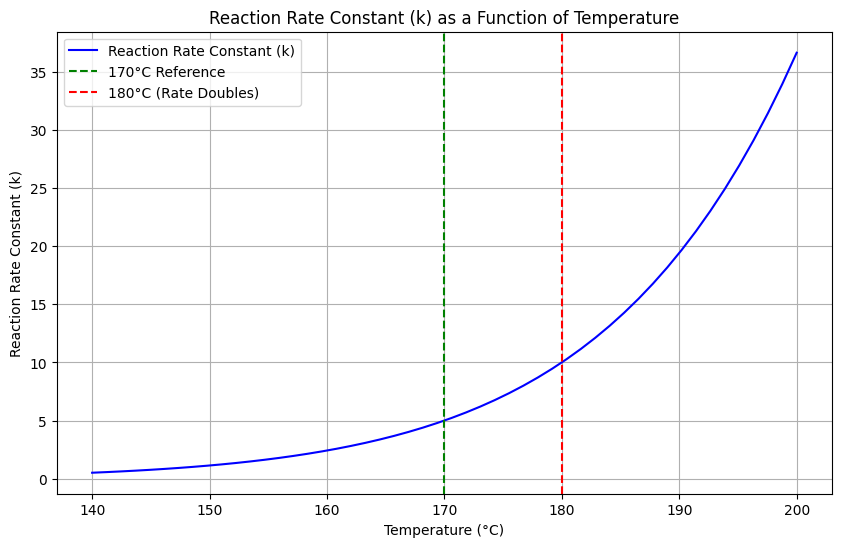

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 8.314  # Gas constant in J/(mol K)

# Reference temperatures and observations
T_ref_celsius = 170           # Reference temperature in Celsius
T_ref = T_ref_celsius + 273.15  # Convert to Kelvin
T_increase_celsius = 180      # Temperature at which rate doubles
T_increase = T_increase_celsius + 273.15

# Observed rate ratio
rate_ratio = 2  # Reaction rate doubles when temperature increases from 170°C to 180°C

# Step 1: Calibrate Activation Energy (Ea)
Ea = -np.log(rate_ratio) * R / (1/T_increase - 1/T_ref)  # Estimated Ea based on doubling rate
Ea_kJ = Ea / 1000  # Convert Ea to kJ/mol for easier interpretation

# Step 2: Calibrate Pre-exponential Factor (A)
# We use the known rate doubling and the Arrhenius equation to determine A
# Assume k at reference temperature is 1 (arbitrary reference to determine A)
k_ref = 5  # Arbitrary reference value
A = k_ref / np.exp(-Ea / (R * T_ref))

# Print calculated values of Ea and A
print(f"Estimated Activation Energy (Ea): {Ea_kJ:.2f} kJ/mol")
print(f"Estimated Pre-exponential Factor (A): {A:.2e}")

# Step 3: Plot Reaction Rate Constant (k) as a Function of Temperature
# Define a range of temperatures from 140°C to 200°C
temperature_range_celsius = np.linspace(140, 200, 50)  # Temperature range in Celsius
temperature_range_kelvin = temperature_range_celsius + 273.15  # Convert to Kelvin

# Calculate k for each temperature using Arrhenius equation
k_values = A * np.exp(-Ea / (R * temperature_range_kelvin))

# Plot the reaction rate constant as a function of temperature
plt.figure(figsize=(10, 6))
plt.plot(temperature_range_celsius, k_values, color='b', label='Reaction Rate Constant (k)')
plt.axvline(x=170, color='g', linestyle='--', label='170°C Reference')
plt.axvline(x=180, color='r', linestyle='--', label='180°C (Rate Doubles)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Reaction Rate Constant (k)')
plt.title('Reaction Rate Constant (k) as a Function of Temperature')
plt.legend()
plt.grid(True)
plt.show()


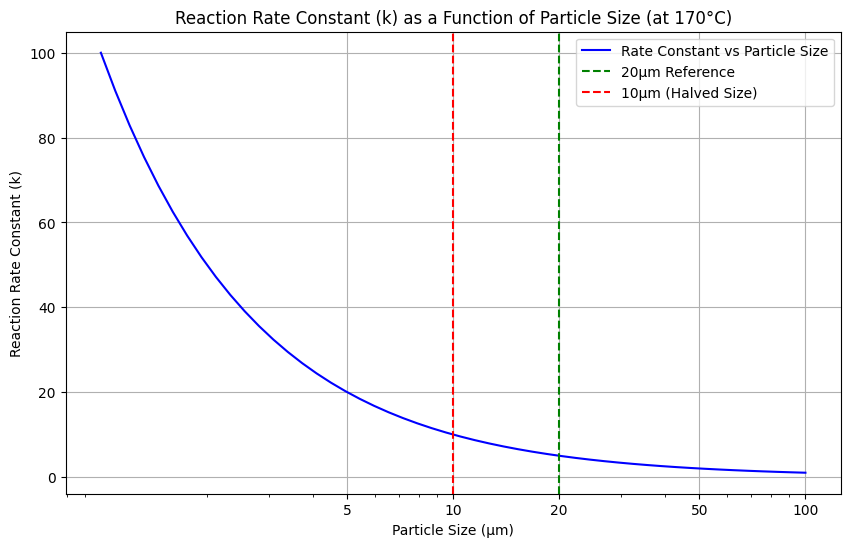

In [24]:
# Step 4: Updated Plot for Reaction Rate Constant as a Function of Particle Size
# Define particle sizes for smooth plot in log scale
particle_sizes_smooth = np.logspace(0, 2, 50)  # Particle sizes from 1 to 100 microns

# Calculate rate constants at reference temperature for different particle sizes
k_values_particle_size_smooth = [rate_constant(T_ref, d) for d in particle_sizes_smooth]

# Plot rate constant as a function of particle size at reference temperature
plt.figure(figsize=(10, 6))
plt.plot(particle_sizes_smooth, k_values_particle_size_smooth, color='b', linestyle='-', label='Rate Constant vs Particle Size')
plt.axvline(x=20, color='g', linestyle='--', label='20µm Reference')
plt.axvline(x=10, color='r', linestyle='--', label='10µm (Halved Size)')
plt.xlabel('Particle Size (µm)')
plt.ylabel('Reaction Rate Constant (k)')
plt.xscale('log')
plt.xticks([5, 10, 20, 50, 100])  # Custom ticks for clarity
plt.gca().get_xaxis().set_major_formatter(plt.ScalarFormatter())  # Set normal numeric labels for log scale
plt.title('Reaction Rate Constant (k) as a Function of Particle Size (at 170°C)')
plt.grid(True)
plt.legend()
plt.show()



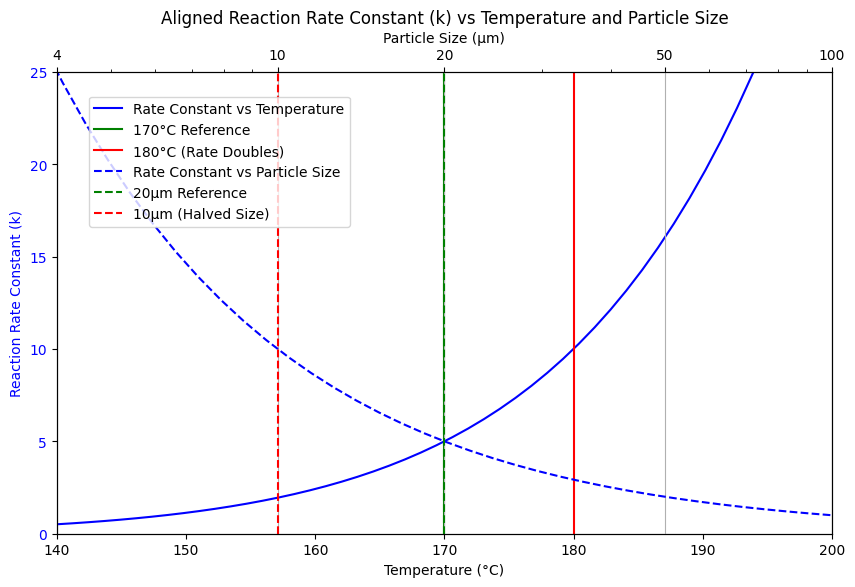

In [32]:
# Step 5: Combined Effect of Temperature and Particle Size in a Double Horizontal Axis Plot with Alignment
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot reaction rate constant as a function of temperature on primary x-axis
ax1.plot(temperature_range_celsius, k_values, color='b', label='Rate Constant vs Temperature')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Reaction Rate Constant (k)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.axvline(x=170, color='g',  label='170°C Reference')
ax1.axvline(x=180, color='r', label='180°C (Rate Doubles)')

# Set x-axis limits for temperature to center the reference point
ax1.set_xlim([140, 200])

# Add a second x-axis for particle size
ax2 = ax1.twiny()

# Plot rate constant as a function of particle size on secondary x-axis
ax2.plot(particle_sizes_smooth, k_values_particle_size_smooth, color='b', linestyle='--', label='Rate Constant vs Particle Size')
ax2.set_xlabel('Particle Size (µm)')
ax2.set_xscale('log')
ax2.set_xticks([4, 10, 20, 50, 100])
ax2.get_xaxis().set_major_formatter(plt.ScalarFormatter())  # Set normal labels for log scale

# Set x-axis limits for particle size to align with temperature axis at the reference point
ax2.set_xlim([4, 100])

# Add vertical reference lines for particle size
ax2.axvline(x=20, color='g', linestyle='--', label='20µm Reference')
ax2.axvline(x=10, color='r', linestyle='--', label='10µm (Halved Size)')

# Set the limit for the y-axis from 0 to 40 for consistency
ax1.set_ylim([0, 25])

# Title and grid
plt.title('Aligned Reaction Rate Constant (k) vs Temperature and Particle Size')
plt.grid(True)

# Adding a legend that includes all labels, including the blue line
fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.85))

plt.show()


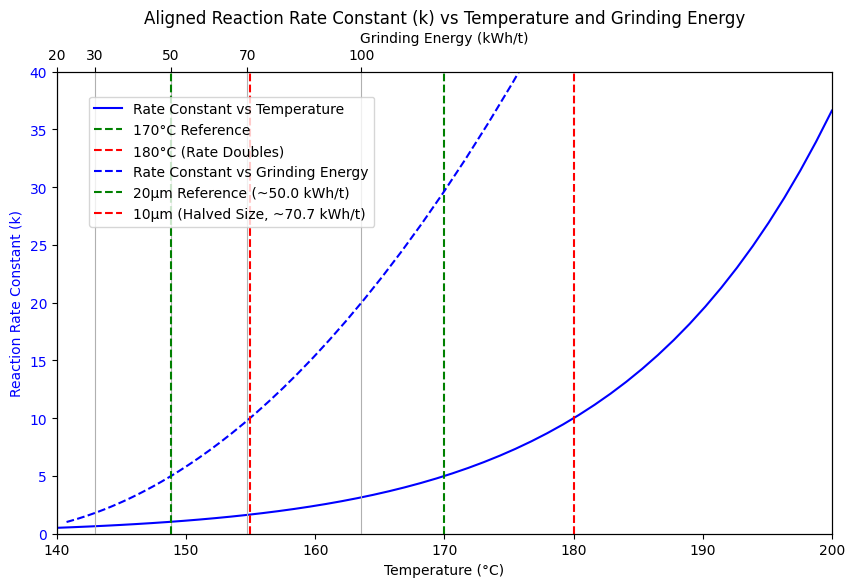

In [31]:
# Step 6: Combined Effect of Temperature and Grinding Energy in a Double Horizontal Axis Plot with Alignment
# Calculate specific grinding energy for particle sizes based on Bond's Law
# Calibration: 15 microns requires 50 kWh/t
sge_ref = 50  # Specific Grinding Energy for 15 microns is 50 kWh/t
d_ref_sge = 20  # Reference particle size in microns

# Use Bond's Law to calibrate Specific Grinding Energy for different particle sizes
sge_values = sge_ref * (d_ref_sge / particle_sizes_smooth) ** 0.5

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot reaction rate constant as a function of temperature on primary x-axis
ax1.plot(temperature_range_celsius, k_values, color='b', label='Rate Constant vs Temperature')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Reaction Rate Constant (k)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.axvline(x=170, color='g', linestyle='--', label='170°C Reference')
ax1.axvline(x=180, color='r', linestyle='--', label='180°C (Rate Doubles)')

# Set x-axis limits for temperature to center the reference point
ax1.set_xlim([140, 200])

# Add a second x-axis for grinding energy
ax2 = ax1.twiny()

# Plot rate constant as a function of grinding energy on secondary x-axis
ax2.plot(sge_values, k_values_particle_size_smooth, color='b', linestyle='--', label='Rate Constant vs Grinding Energy')
ax2.set_xlabel('Grinding Energy (kWh/t)')
ax2.set_xticks([20, 30, 50, 70, 100])
ax2.get_xaxis().set_major_formatter(plt.ScalarFormatter())  # Set normal labels for log scale

# Set x-axis limits for grinding energy to align with temperature axis at the reference point
ax2.set_xlim([20, max(sge_values)])

# Add vertical reference lines for grinding energy
# Find the corresponding energy value for 20 microns
energy_20_micron = sge_ref * (d_ref_sge / 20) ** 0.5
energy_10_micron = sge_ref * (d_ref_sge / 10) ** 0.5
ax2.axvline(x=energy_20_micron, color='g', linestyle='--', label='20µm Reference (~{:.1f} kWh/t)'.format(energy_20_micron))
ax2.axvline(x=energy_10_micron, color='r', linestyle='--', label='10µm (Halved Size, ~{:.1f} kWh/t)'.format(energy_10_micron))

# Set the limit for the y-axis from 0 to 40 for consistency
ax1.set_ylim([0, 40])

# Title and grid
plt.title('Aligned Reaction Rate Constant (k) vs Temperature and Grinding Energy')
plt.grid(True)

# Adding a legend that includes all labels, including the blue line
fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.85))

plt.show()


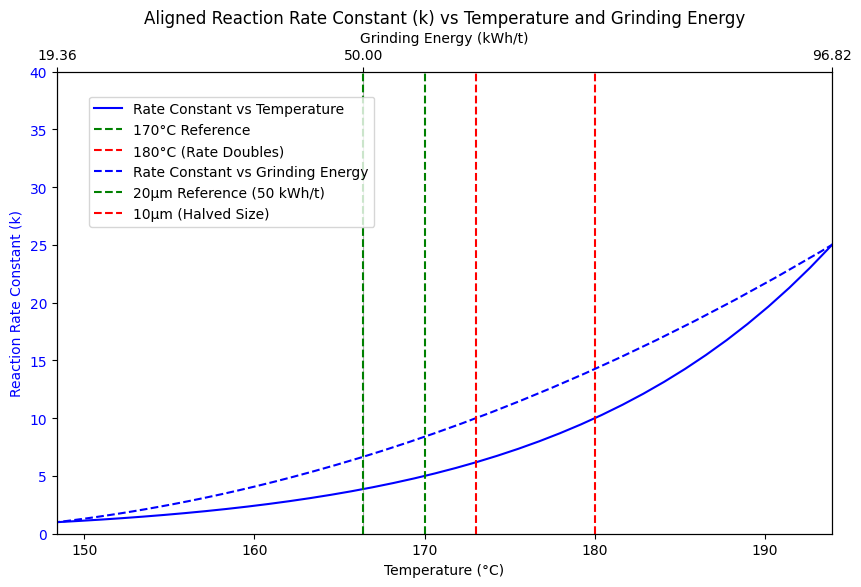

In [35]:
# Step 7: Find Temperature and Energy Limits for Rate Constant of 1 and 40
# Define the rate constant values we want to set the limits for
k_min, k_max = 1, 25

# Temperature limits: Solve for temperature (in Celsius) for k_min and k_max
T_min_kelvin = Ea / (R * np.log(A / k_min))
T_max_kelvin = Ea / (R * np.log(A / k_max))
T_min_celsius = T_min_kelvin - 273.15
T_max_celsius = T_max_kelvin - 273.15

# Particle size limits: Solve for particle size corresponding to k_min and k_max
# Since k is inversely proportional to particle size, rearrange to solve for d
d_min = d_ref * (k_ref / k_max)
d_max = d_ref * (k_ref / k_min)

# Calculate the specific grinding energy for the particle size limits
sge_min = sge_ref * (d_ref_sge / d_max) ** 0.5
sge_max = sge_ref * (d_ref_sge / d_min) ** 0.5

# Step 8: Updated Plot with New Limits for Temperature and Grinding Energy
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot reaction rate constant as a function of temperature on primary x-axis
ax1.plot(temperature_range_celsius, k_values, color='b', label='Rate Constant vs Temperature')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Reaction Rate Constant (k)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.axvline(x=170, color='g', linestyle='--', label='170°C Reference')
ax1.axvline(x=180, color='r', linestyle='--', label='180°C (Rate Doubles)')

# Set x-axis limits for temperature to align the reference point
ax1.set_xlim([T_min_celsius, T_max_celsius])

# Add a second x-axis for grinding energy
ax2 = ax1.twiny()

# Plot rate constant as a function of grinding energy on secondary x-axis
ax2.plot(sge_values, k_values_particle_size_smooth, color='b', linestyle='--', label='Rate Constant vs Grinding Energy')
ax2.set_xlabel('Grinding Energy (kWh/t)')
ax2.set_xticks([sge_min, sge_ref, sge_max])
ax2.get_xaxis().set_major_formatter(plt.ScalarFormatter())  # Set normal labels for log scale

# Set x-axis limits for grinding energy to align the reference point
ax2.set_xlim([sge_min, sge_max])

# Add vertical reference lines for grinding energy at 20 microns
ax2.axvline(x=sge_ref, color='g', linestyle='--', label='20µm Reference (50 kWh/t)')
energy_10_micron = sge_ref * (d_ref_sge / 10) ** 0.5
ax2.axvline(x=energy_10_micron, color='r', linestyle='--', label='10µm (Halved Size)')

# Set the limit for the y-axis from 0 to 40 for consistency
ax1.set_ylim([0, 40])

# Title and grid
plt.title('Aligned Reaction Rate Constant (k) vs Temperature and Grinding Energy')
plt.grid(True)

# Adding a legend that includes all labels, including the blue line
fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.85))

plt.show()


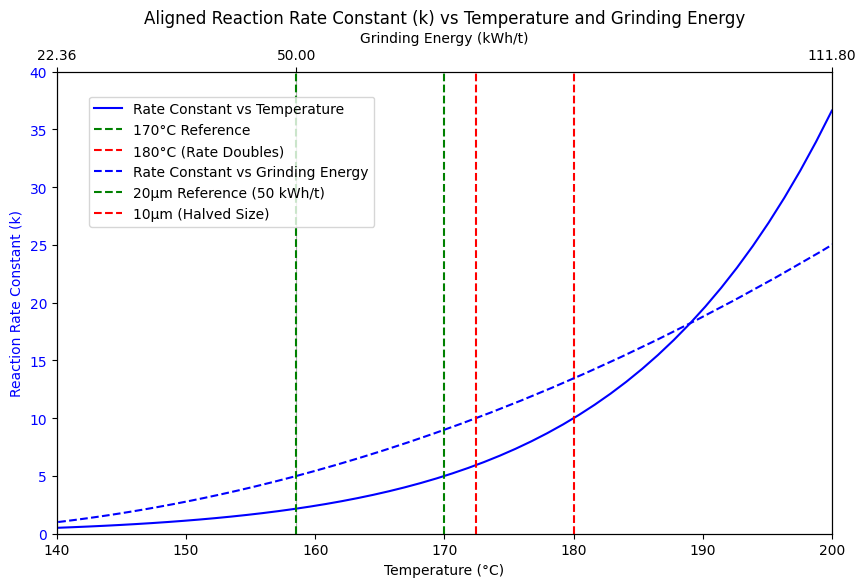

In [36]:
# Step 6: Combined Effect of Temperature and Grinding Energy in a Double Horizontal Axis Plot with Simple Alignment
# Calculate specific grinding energy for particle sizes based on Bond's Law
# Calibration: 20 microns requires 50 kWh/t
sge_ref = 50  # Specific Grinding Energy for 20 microns is 50 kWh/t
d_ref_sge = 20  # Reference particle size in microns

# Use Bond's Law to calibrate Specific Grinding Energy for different particle sizes
sge_values = sge_ref * (d_ref_sge / particle_sizes_smooth) ** 0.5

# Define specific grinding energy bounds based on 4 microns and 100 microns
sge_min = sge_ref * (d_ref_sge / 100) ** 0.5  # Grinding energy for 100 microns
sge_max = sge_ref * (d_ref_sge / 4) ** 0.5    # Grinding energy for 4 microns

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot reaction rate constant as a function of temperature on primary x-axis
ax1.plot(temperature_range_celsius, k_values, color='b', label='Rate Constant vs Temperature')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Reaction Rate Constant (k)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.axvline(x=170, color='g', linestyle='--', label='170°C Reference')
ax1.axvline(x=180, color='r', linestyle='--', label='180°C (Rate Doubles)')

# Set x-axis limits for temperature
ax1.set_xlim([140, 200])

# Add a second x-axis for grinding energy
ax2 = ax1.twiny()

# Plot rate constant as a function of grinding energy on secondary x-axis
ax2.plot(sge_values, k_values_particle_size_smooth, color='b', linestyle='--', label='Rate Constant vs Grinding Energy')
ax2.set_xlabel('Grinding Energy (kWh/t)')
ax2.set_xticks([sge_min, sge_ref, sge_max])
ax2.get_xaxis().set_major_formatter(plt.ScalarFormatter())  # Set normal labels for log scale

# Set x-axis limits for grinding energy to align the reference point
ax2.set_xlim([sge_min, sge_max])

# Add vertical reference lines for grinding energy at 20 microns
ax2.axvline(x=sge_ref, color='g', linestyle='--', label='20µm Reference (50 kWh/t)')
energy_10_micron = sge_ref * (d_ref_sge / 10) ** 0.5
ax2.axvline(x=energy_10_micron, color='r', linestyle='--', label='10µm (Halved Size)')

# Set the limit for the y-axis from 0 to 40 for consistency
ax1.set_ylim([0, 40])

# Title and grid
plt.title('Aligned Reaction Rate Constant (k) vs Temperature and Grinding Energy')
plt.grid(True)

# Adding a legend that includes all labels, including the blue line
fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.85))

plt.show()


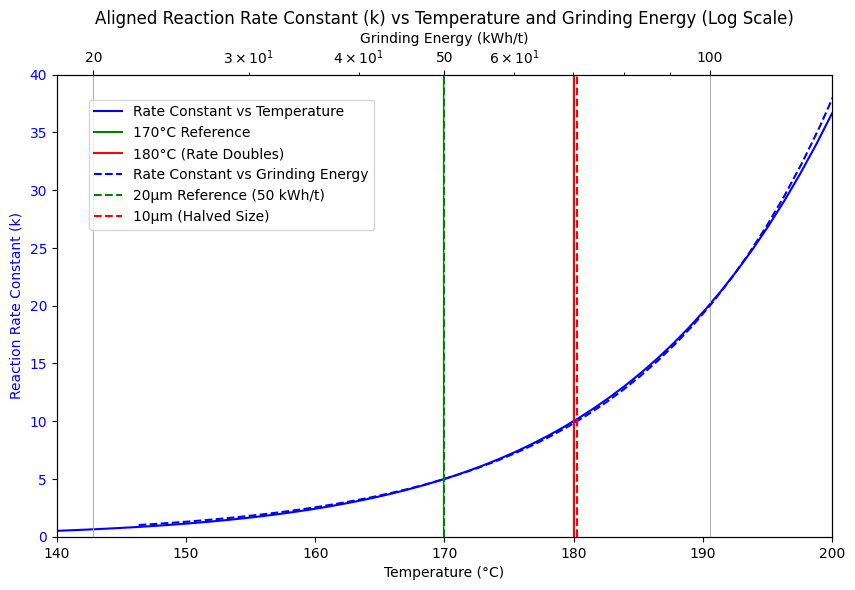

In [45]:
# Step 6: Combined Effect of Temperature and Grinding Energy in a Double Horizontal Axis Plot with Logarithmic Energy Axis
# Calculate specific grinding energy for particle sizes based on Bond's Law
# Calibration: 20 microns requires 50 kWh/t
sge_ref = 50  # Specific Grinding Energy for 20 microns is 50 kWh/t
d_ref_sge = 20  # Reference particle size in microns

# Use Bond's Law to calibrate Specific Grinding Energy for different particle sizes
sge_values = sge_ref * (d_ref_sge / particle_sizes_smooth) ** 0.5

# Define specific grinding energy bounds based on 4 microns and 100 microns
sge_min = sge_ref * (d_ref_sge / 100) ** 0.5 /1.23 # Grinding energy for 100 microns
sge_max = sge_ref * (d_ref_sge / 4) ** 0.5   *1.23 # Grinding energy for 4 microns

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot reaction rate constant as a function of temperature on primary x-axis
ax1.plot(temperature_range_celsius, k_values, color='b', label='Rate Constant vs Temperature')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Reaction Rate Constant (k)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.axvline(x=170, color='g', label='170°C Reference')
ax1.axvline(x=180, color='r', label='180°C (Rate Doubles)')

# Set x-axis limits for temperature
ax1.set_xlim([140, 200])

# Add a second x-axis for grinding energy
ax2 = ax1.twiny()

# Plot rate constant as a function of grinding energy on secondary x-axis
ax2.plot(sge_values, k_values_particle_size_smooth, color='b', linestyle='--', label='Rate Constant vs Grinding Energy')
ax2.set_xlabel('Grinding Energy (kWh/t)')
ax2.set_xscale('log')
ax2.set_xticks([10, 20, 50, 100, 200])
ax2.get_xaxis().set_major_formatter(plt.ScalarFormatter())  # Set normal labels for log scale

# Set x-axis limits for grinding energy to align the reference point
ax2.set_xlim([sge_min, sge_max])

# Add vertical reference lines for grinding energy at 20 microns
ax2.axvline(x=sge_ref, color='g', linestyle='--', label='20µm Reference (50 kWh/t)')
energy_10_micron = sge_ref * (d_ref_sge / 10) ** 0.5
ax2.axvline(x=energy_10_micron, color='r', linestyle='--', label='10µm (Halved Size)')

# Set the limit for the y-axis from 0 to 40 for consistency
ax1.set_ylim([0, 40])

# Title and grid
plt.title('Aligned Reaction Rate Constant (k) vs Temperature and Grinding Energy (Log Scale)')
plt.grid(True)

# Adding a legend that includes all labels, including the blue line
fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.85))

plt.show()


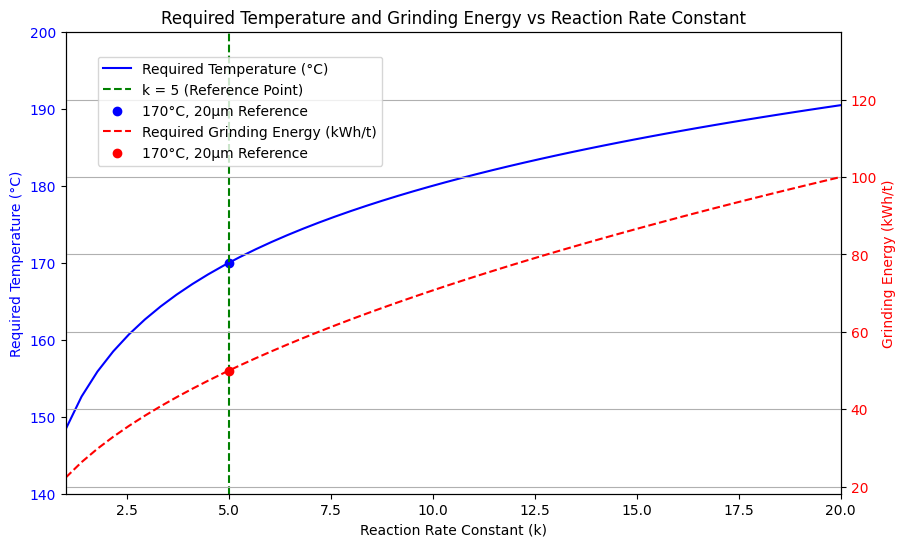

In [50]:
# Step 7: Plot Rate Constant vs Required Temperature and Grinding Energy
# Define range of rate constants (1 to 20)
k_values_range = np.linspace(1, 20, 50)

# Calculate required temperature (in Celsius) to achieve each rate constant
required_temperatures = []
for k in k_values_range:
    T_kelvin = Ea / (R * np.log(A / k))
    T_celsius = T_kelvin - 273.15
    required_temperatures.append(T_celsius)

# Calculate required grinding energy to achieve each rate constant
required_sge = []
for k in k_values_range:
    # Since rate constant scales with specific surface area, we can determine the required d
    required_d = d_ref * (k_ref / k)
    # Calculate the corresponding grinding energy for that particle size using Bond's Law
    sge = sge_ref * (d_ref_sge / required_d) ** 0.5
    required_sge.append(sge)

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot required temperature as a function of rate constant on primary y-axis
ax1.plot(k_values_range, required_temperatures, color='b', label='Required Temperature (°C)')
ax1.set_xlabel('Reaction Rate Constant (k)')
ax1.set_ylabel('Required Temperature (°C)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim([140, 200])

# Set x-axis limits for rate constant
ax1.set_xlim([1, 20])

# Add a second y-axis for grinding energy
ax2 = ax1.twinx()

# Plot required grinding energy as a function of rate constant on secondary y-axis
ax2.plot(k_values_range, required_sge, color='r', linestyle='--', label='Required Grinding Energy (kWh/t)')
ax2.set_ylabel('Grinding Energy (kWh/t)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim([sge_min, sge_max])

# Add reference point for k = 5
ax1.axvline(x=5, color='g', linestyle='--', label='k = 5 (Reference Point)')
ax1.scatter(5, 170, color='b', marker='o', label='170°C, 20µm Reference')
ax2.scatter(5, 50, color='r', marker='o', label='170°C, 20µm Reference')

# Title and grid
plt.title('Required Temperature and Grinding Energy vs Reaction Rate Constant')
plt.grid(True)

# Adding a legend that includes all labels
fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.85))

plt.show()


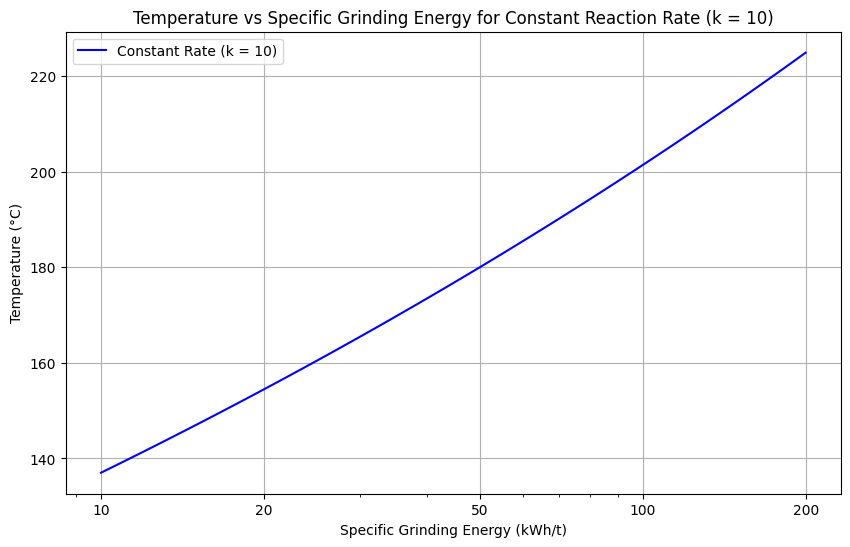

In [51]:
# Step 9: Plot Temperature vs Grinding Energy for a Constant Reaction Rate
# Choose a constant rate value for the line
k_constant = 5  # Arbitrary constant rate value

# Define grinding energy range (logarithmic scale, from ~10 to ~200 kWh/t)
sge_values_for_constant_rate = np.logspace(1, 2.3, 50)  # From 10 to 200 kWh/t

# Calculate the required temperature to maintain a constant rate for each SGE value
required_temperatures_for_constant_rate = []
for sge in sge_values_for_constant_rate:
    # Calculate the corresponding particle size using Bond's Law
    particle_size = d_ref_sge * (sge_ref / sge) ** 2
    # Calculate the required temperature to achieve the constant rate with this particle size
    k_T = A * np.exp(-Ea / (R * T_ref)) * (d_ref / particle_size)  # Maintain k_constant
    T_kelvin = Ea / (R * np.log(A / k_constant * (particle_size / d_ref)))
    T_celsius = T_kelvin - 273.15
    required_temperatures_for_constant_rate.append(T_celsius)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(sge_values_for_constant_rate, required_temperatures_for_constant_rate, color='b', linestyle='-', label='Constant Rate (k = 10)')
plt.xlabel('Specific Grinding Energy (kWh/t)')
plt.ylabel('Temperature (°C)')
plt.xscale('log')
plt.xticks([10, 20, 50, 100, 200])  # Custom ticks for clarity
plt.gca().get_xaxis().set_major_formatter(plt.ScalarFormatter())  # Set normal labels for log scale
plt.grid(True)
plt.title('Temperature vs Specific Grinding Energy for Constant Reaction Rate (k = 10)')
plt.legend()
plt.show()


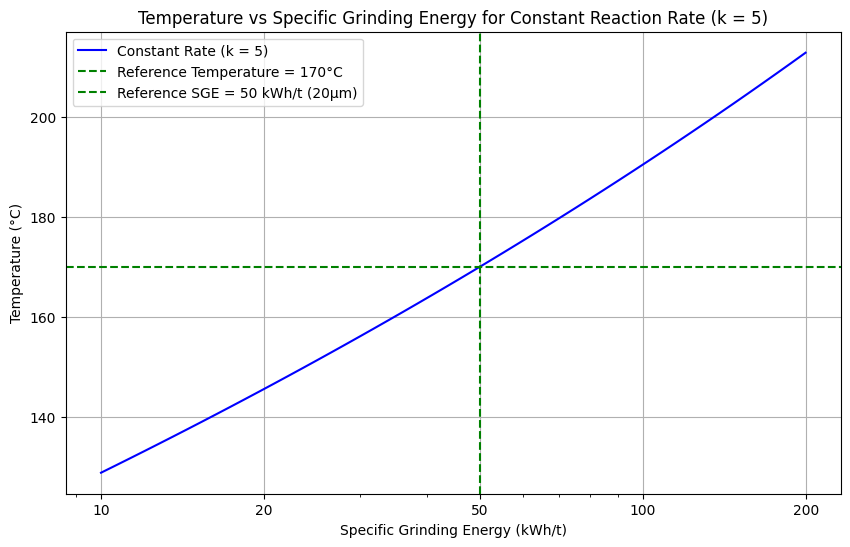

In [52]:
# Step 9: Plot Temperature vs Grinding Energy for a Constant Reaction Rate with Reference Point k = 5
# Set the constant reaction rate to match the reference point
k_constant = 5  # Reference constant rate value

# Define grinding energy range (logarithmic scale, from ~10 to ~200 kWh/t)
sge_values_for_constant_rate = np.logspace(1, 2.3, 50)  # From 10 to 200 kWh/t

# Calculate the required temperature to maintain a constant rate for each SGE value
required_temperatures_for_constant_rate = []
for sge in sge_values_for_constant_rate:
    # Calculate the corresponding particle size using Bond's Law
    particle_size = d_ref_sge * (sge_ref / sge) ** 2  # Rearranged to get particle size from SGE
    # Calculate the required temperature to achieve the constant rate with this particle size
    k_T = A * np.exp(-Ea / (R * T_ref)) * (d_ref / particle_size)  # Rate adjustment due to particle size
    T_kelvin = Ea / (R * np.log(A / k_constant * (particle_size / d_ref)))
    T_celsius = T_kelvin - 273.15
    required_temperatures_for_constant_rate.append(T_celsius)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(sge_values_for_constant_rate, required_temperatures_for_constant_rate, color='b', linestyle='-', label='Constant Rate (k = 5)')
plt.xlabel('Specific Grinding Energy (kWh/t)')
plt.ylabel('Temperature (°C)')
plt.xscale('log')
plt.xticks([10, 20, 50, 100, 200])  # Custom ticks for clarity
plt.gca().get_xaxis().set_major_formatter(plt.ScalarFormatter())  # Set normal labels for log scale
plt.axhline(y=170, color='g', linestyle='--', label='Reference Temperature = 170°C')
plt.axvline(x=sge_ref, color='g', linestyle='--', label='Reference SGE = 50 kWh/t (20µm)')
plt.grid(True)
plt.title('Temperature vs Specific Grinding Energy for Constant Reaction Rate (k = 5)')
plt.legend()
plt.show()


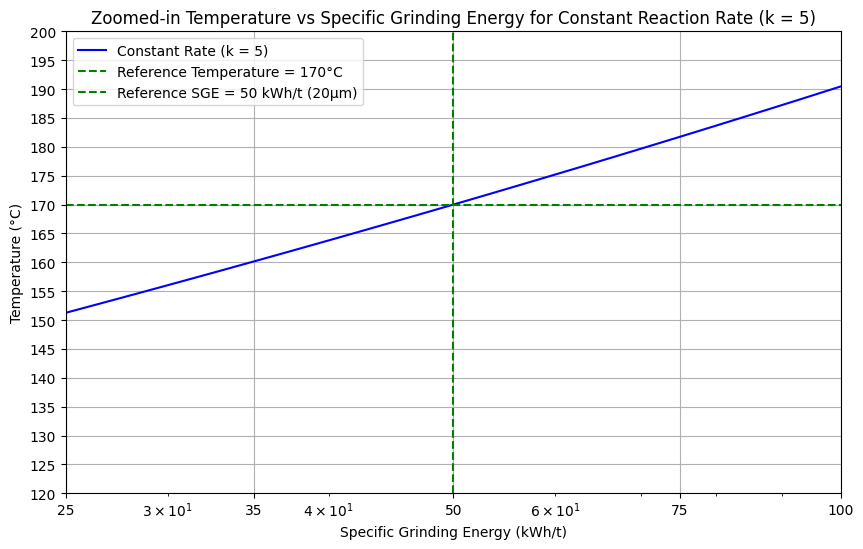

In [53]:
# Step 9: Zoomed-in Plot of Temperature vs Grinding Energy for a Constant Reaction Rate with Reference Point k = 5
# Set the constant reaction rate to match the reference point
k_constant = 5  # Reference constant rate value

# Define grinding energy range from 25 to 100 kWh/t (logarithmic scale for consistency)
sge_values_for_constant_rate_zoomed = np.logspace(np.log10(25), np.log10(100), 50)

# Calculate the required temperature to maintain a constant rate for each SGE value
required_temperatures_for_constant_rate_zoomed = []
for sge in sge_values_for_constant_rate_zoomed:
    # Calculate the corresponding particle size using Bond's Law
    particle_size = d_ref_sge * (sge_ref / sge) ** 2  # Rearranged to get particle size from SGE
    # Calculate the required temperature to achieve the constant rate with this particle size
    T_kelvin = Ea / (R * np.log(A / k_constant * (particle_size / d_ref)))
    T_celsius = T_kelvin - 273.15
    required_temperatures_for_constant_rate_zoomed.append(T_celsius)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(sge_values_for_constant_rate_zoomed, required_temperatures_for_constant_rate_zoomed, color='b', linestyle='-', label='Constant Rate (k = 5)')
plt.xlabel('Specific Grinding Energy (kWh/t)')
plt.ylabel('Temperature (°C)')
plt.xscale('log')

# Custom ticks for clarity
plt.xticks([25, 35, 50, 75, 100])
plt.gca().get_xaxis().set_major_formatter(plt.ScalarFormatter())  # Set normal labels for log scale
plt.yticks(np.arange(120, 210, 5))  # Every 5 degrees from 120°C to 200°C

# Add reference lines
plt.axhline(y=170, color='g', linestyle='--', label='Reference Temperature = 170°C')
plt.axvline(x=sge_ref, color='g', linestyle='--', label='Reference SGE = 50 kWh/t (20µm)')

# Set axis limits for better zoomed-in visualization
plt.xlim([25, 100])
plt.ylim([120, 200])

# Title and grid
plt.title('Zoomed-in Temperature vs Specific Grinding Energy for Constant Reaction Rate (k = 5)')
plt.grid(True)

# Adding a legend that includes all labels
plt.legend(loc="upper left")

plt.show()


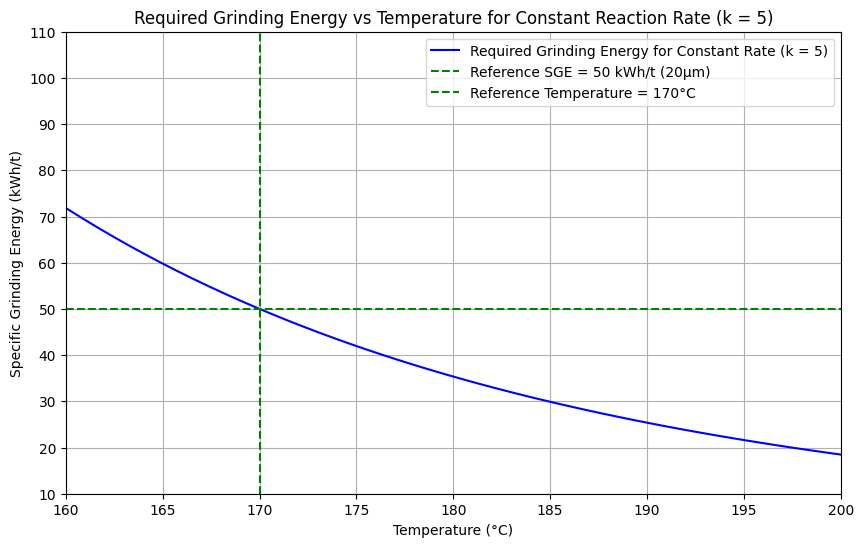

In [54]:
# Step 10: Plot Required Grinding Energy vs Temperature for Constant Reaction Rate (k = 5)
# Define temperature range from 160 to 200°C
temperature_range_celsius_zoomed = np.linspace(160, 200, 50)
temperature_range_kelvin_zoomed = temperature_range_celsius_zoomed + 273.15  # Convert to Kelvin

# Calculate the required grinding energy to maintain a constant rate for each temperature
required_sge_for_constant_rate_zoomed = []
for T in temperature_range_kelvin_zoomed:
    # Calculate rate constant at this temperature without considering particle size
    k_T = A * np.exp(-Ea / (R * T))
    # Rearrange to determine the particle size required for k to stay constant
    required_d = d_ref * (k_T / k_constant)
    # Calculate the corresponding grinding energy for that particle size using Bond's Law
    sge = sge_ref * (d_ref_sge / required_d) ** 0.5
    required_sge_for_constant_rate_zoomed.append(sge)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(temperature_range_celsius_zoomed, required_sge_for_constant_rate_zoomed, color='b', linestyle='-', label='Required Grinding Energy for Constant Rate (k = 5)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Specific Grinding Energy (kWh/t)')
plt.xticks(np.arange(160, 205, 5))  # Custom ticks for temperature, every 5°C
plt.yticks(np.arange(10, 120, 10))  # Custom ticks for grinding energy, every 10 kWh/t

# Add reference lines for the reference point
plt.axhline(y=50, color='g', linestyle='--', label='Reference SGE = 50 kWh/t (20µm)')
plt.axvline(x=170, color='g', linestyle='--', label='Reference Temperature = 170°C')

# Set axis limits for better visualization
plt.xlim([160, 200])
plt.ylim([10, 110])

# Title and grid
plt.title('Required Grinding Energy vs Temperature for Constant Reaction Rate (k = 5)')
plt.grid(True)

# Adding a legend that includes all labels
plt.legend(loc="upper right")

plt.show()


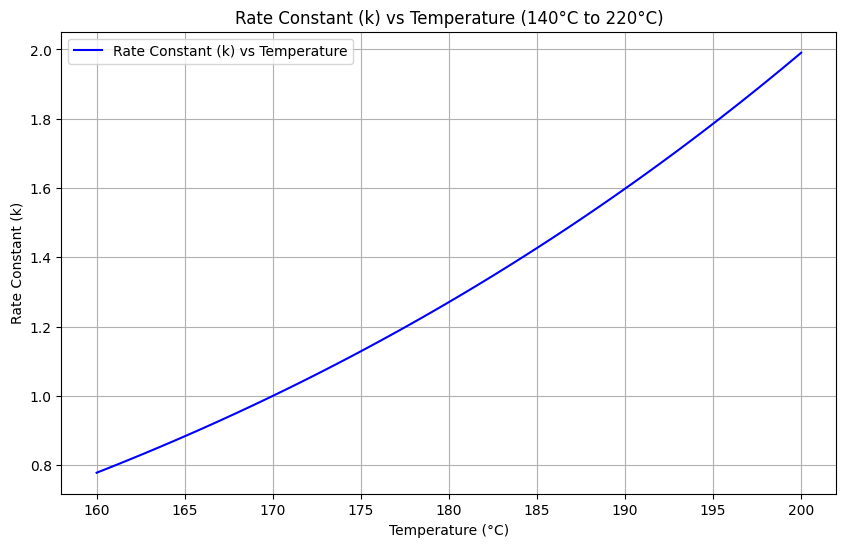

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
Ea = 40e3  # Activation energy in J/mol (given as 50 kJ/mol)
R = 8.314  # Universal gas constant in J/(mol*K)
T_ref_celsius = 170  # Reference temperature in Celsius
T_ref = T_ref_celsius + 273.15  # Reference temperature in Kelvin
k_ref = 5  # Reference rate constant

# Temperature range for plotting (140°C to 220°C)
temperature_range_celsius = np.linspace(160, 200, 100)
temperature_range_kelvin = temperature_range_celsius + 273.15  # Convert to Kelvin

# Calculate rate constant (k) for each temperature using the Arrhenius equation
# k = k_ref * exp(-Ea / (R * (1/T - 1/T_ref)))
k_values = k_ref * np.exp(-Ea / R * (1 / temperature_range_kelvin - 1 / T_ref))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(temperature_range_celsius, k_values/5, color='b', label='Rate Constant (k) vs Temperature')
#plt.axvline(x=170, color='g', linestyle='--', label='Reference Temperature = 170°C')
#plt.axhline(y=5, color='g', linestyle='--', label='Reference Rate Constant = k = 5')

# Labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Rate Constant (k)')
plt.title('Rate Constant (k) vs Temperature (140°C to 220°C)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

